In [3]:
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [14]:
def plot_graph(path, model, ppr_k=30, m=10):
    d = os.path.abspath(path+"/task2")
    output_dir = os.path.join("outputs", "task2/plots")
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    tf_list, tfidf_list = [], []
    files = os.listdir(d)
    if model=="dominant":
        for i in [2, 3, 4, 5]:
            f_tf = os.path.join(d, "{}_{}_".format(ppr_k, m)+model+"_1_{}.txt".format(i))
            data_tf = json.load(open(f_tf, "r"))
            try:
                acc = data_tf['acc']
                a = acc['voting'] if acc['voting']>acc['wt_scores'] else acc['wt_scores']
                name = "PPR_{}_{}_old".format(ppr_k, m)
            except:
                a = data_tf['$Accuracy']
                name = "PPR_{}_{}_new".format(ppr_k, m)
            tf_list.append(np.round(a, decimals=2))
            
            f_idf = os.path.join(d, "{}_{}_".format(ppr_k, m)+model+"_2_{}.txt".format(i))
            data_idf = json.load(open(f_idf, "r"))
            try:
                acc = data_tf['acc']
                a = acc['voting'] if acc['voting']>acc['wt_scores'] else acc['wt_scores']
                name = "PPR_{}_{}_old".format(ppr_k, m)
            except:
                a = data_tf['$Accuracy']
                name = "PPR_{}_{}_new".format(ppr_k, m)
            tfidf_list.append(np.round(a, decimals=2))
        labels = ['PCA', 'SVD', 'NMF', 'LDA'] #'Edit-Distance', 'DTW-Distance']
    else:
        name = model
        l = [i for i in files if model in i]
        for i in [1,2 ,3, 4]:
            f_tf = os.path.join(d, model+"_1_{}.txt".format(i))
            data_tf = json.load(open(f_tf, "r"))
            tf_list.append(np.round(data_tf['Accuracy'], decimals=2))
            f_idf = os.path.join(d, model+"_2_{}.txt".format(i))
            data_idf = json.load(open(f_idf, "r"))
            tfidf_list.append(np.round(data_idf['Accuracy'], decimals=2))
        labels = ['PCA', 'SVD', 'NMF', 'LDA']    
    
    x = np.arange(len(labels))  
    width = 0.35  

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, tf_list, width, label='TF')
    rects2 = ax.bar(x + width/2, tfidf_list, width, label='TF-IDF')

    ax.set_ylabel('Accuracy')
    ax.set_title('Model')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()
    fig.savefig(os.path.join(output_dir, name+".png"))
    



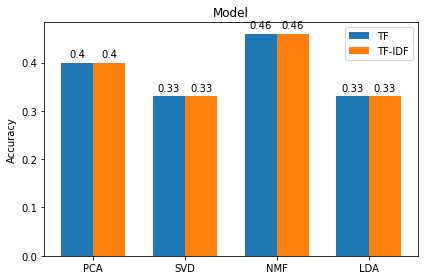

In [18]:
plot_graph("outputs", "dominant", 20)

In [3]:
import pandas as pd
import json
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

uf, dg, ks = [], [], []
for f in [os.path.join("outputs","task1",x,y) for x in os.listdir("outputs/task1") for y in os.listdir(os.path.join("outputs/task1",x)) if ".txt" in y]:
    d = json.load(open(f, "r"))
    ks.append(f.split("/")[-1].split("_")[0])
    uf.append(d['user_files'])
    dg.append(d['dominant_gestures'])
df = pd.DataFrame(list(zip(uf,ks,dg)), columns=['user_files','k_value','dominant_gestures'])

In [4]:
df

,user_files,k_value,dominant_gestures
0,"[1, 3, 5]",3,"[0000001, 0000005, 0000003, 00012-7, 00012-0, 00012-1, 00012-8, 00012-9, 00012-2, 00012-3]"
1,"[1, 40, 72]",3,"[0000269, 0000001, 00001-8, 00012-1, 00012-8, 00012-9, 00012-2, 00012-3, 00004-9, 00004-3]"
2,"[1, 3, 5]",5,"[0000003, 0000005, 0000001, 00012-7, 00012-0, 00012-1, 00012-8, 00012-9, 00012-2, 00012-3]"
3,"[1, 40, 72]",5,"[0000269, 0000001, 00001-8, 00265-2, 00265-7, 00265-6, 00265-3, 00012-1, 00012-8, 00012-9]"


In [14]:
df = pd.concat([df,df1], axis=0)

In [15]:
df.head()

,user_files,dominant_gestures
0,"[1, 40, 72]","[001, 257, 568, 579, 266, 249, 026, 023, 584, 027]"
1,"[1, 40, 72]","[001, 257, 568, 579, 266, 249, 026, 023, 584, 580]"
0,"[1, 3, 5]","[005, 003, 001, 030, 028, 027, 023, 026, 584, 019]"
1,"[1, 3, 5]","[005, 001, 003, 030, 028, 027, 023, 026, 584, 011]"


In [16]:
df

,user_files,dominant_gestures
0,"[1, 40, 72]","[001, 257, 568, 579, 266, 249, 026, 023, 584, 027]"
1,"[1, 40, 72]","[001, 257, 568, 579, 266, 249, 026, 023, 584, 580]"
0,"[1, 3, 5]","[005, 003, 001, 030, 028, 027, 023, 026, 584, 019]"
1,"[1, 3, 5]","[005, 001, 003, 030, 028, 027, 023, 026, 584, 011]"
